<h1>Disaster of "Estonia"</h1> 

<p style="font-size:18px">The dataset contains the name, age, sex, category and fate of the 989 passengers aboard the MS Estonia on the night of the sinking.<br>
<br> 
The Estonia was a RoPax Baltic Sea ferry that sank off the Finnish island of Utö on September 28, 1994 on its way from Tallinn to Stockholm. With 852 casualties, the sinking of the Estonia is the worst shipping disaster in European post-war history.<br>
<br> 
There were doubts about the 1997 final report of the official commission of inquiry and gave rise to speculation that a new independent investigation into the accident would be ordered. According to wikipedia, in March 2005 the Swedish government announced that a new computer simulation investigation had been put out to tender internationally. This was then carried out at the Technical University of Hamburg. These tests proved that the Kru's actions were not the cause of the accident. In addition, the simulation showed that with such an incline, most of the passengers had no chance of getting on deck via the escape routes from inside the ship. The simulation also showed that the IMO regulations for combined passenger-car ferries are insufficient.<br>
<br> 
In July 2019, almost 25 years after the sinking of the Estonia, a French court in Nanterre dismissed civil claims against the German Meyer Werft and the French auditing company Bureau Veritas. The inspectors had classified the ferry as seaworthy. Over 1000 plaintiffs - including survivors and relatives of the victims - had demanded more than 40 million euros in damages.<br>
<br> 
Task of the tutorial: I am going to build a machine learning model using Logistic Regression which is supposed to predict who survived or not.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('talk')

# for logistic regression:
from sklearn.model_selection import train_test_split # split data into test and train
from sklearn.linear_model import LogisticRegression  # linear regression
from sklearn.metrics import classification_report  # classification report

# for Confusion Matrix
from sklearn import metrics

In [2]:
data = pd.read_csv("datasets_estonia-passenger-list.csv")

In [3]:
data.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


<h2>2. Data Cleaning</h2>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


In [5]:
100*data.isnull().sum()/len(data)

PassengerId    0.0
Country        0.0
Firstname      0.0
Lastname       0.0
Sex            0.0
Age            0.0
Category       0.0
Survived       0.0
dtype: float64

<p style="font-size:18px">As we can see, the table has no missing data.<br> 
But we have columns with object data types.<br> 
I am not yet familiar with the subject of "language processing", unfortunately I have to drop these columns.<br>
But first let us take a look at the data.</p>

Text(0.5, 0, 'Age')

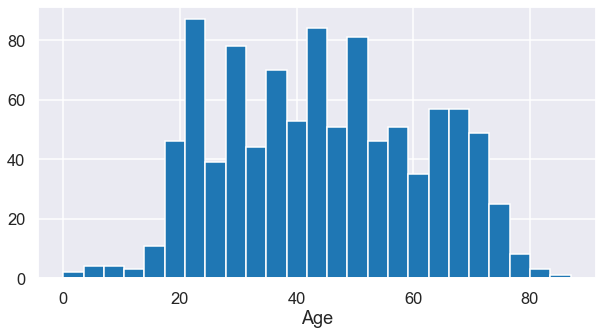

In [6]:
sns.set_style('darkgrid')
data['Age'].hist(bins=25, figsize = (10, 5))
plt.xlabel('Age')

<h4>Age in relation to sex</h4>

In [7]:
bins = [-np.inf,16,32,48,64,np.inf]
labels = ['0-16', '16-32', '32-48', '48-64', '64+']
data['agegroup']=pd.cut(data["Age"], bins, labels = labels)

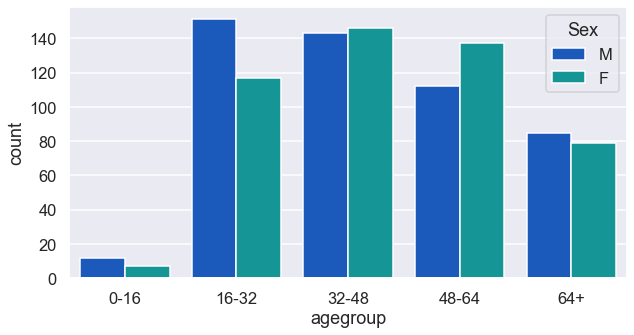

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize = (10, 5))
sns.countplot('agegroup', hue="Sex", data = data, palette="winter")

<p style="font-size:18px">We see the different agegroups on board of the "Estonia". The biggest groups are 16-32, 32-48 and 48-64.<br>
Related to sex: in the group 32-48 is the number of men and women roughly the same.<br>
In the group 16-32 most of the passengers were male.<br>
In the third largest agegroup 48-64, women represent a larger group of passengers.<br>
Fortunately the smallest group were children up to 16 years.</p>

In [10]:
data["Age"].median()

44.0

<h4>Number of passengers by agegroup</h4>

In [11]:
data["agegroup"].value_counts( )

32-48    289
16-32    268
48-64    249
64+      164
0-16      19
Name: agegroup, dtype: int64

<h4>The five biggest groupes by country</h4>

In [13]:
cff = data["agegroup"].groupby(data["Country"]).count().sort_values(ascending = False)[0:5]

In [14]:
cff = pd.DataFrame(cff)
cff = cff.reset_index()
cff.head()

,Country,agegroup
0,Sweden,550
1,Estonia,344
2,Latvia,28
3,Finland,16
4,Russia,14


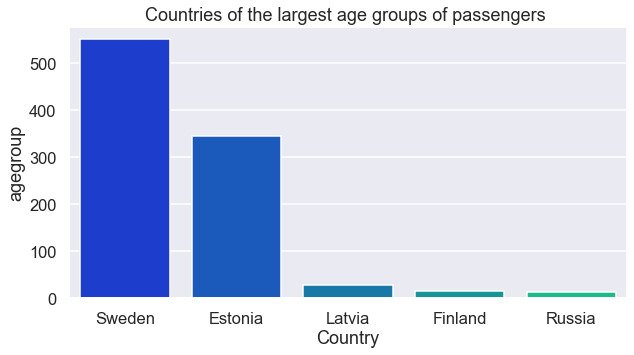

In [15]:
sns.barplot(x="Country", y="agegroup", data=cff, palette="winter").set_title('Countries of the largest age groups of passengers ')
fig=plt.gcf()
fig.set_size_inches(10,5)

<p style="font-size:18px">550 Passengers are from Sweden, 344 are from Estonia - this countries have the biggest count of passengers agegroup.<br> 
Folloved by Latvia with 28, Finland with 16 and Russia with 14.</p>  

In [17]:
data["Category"].value_counts()

P    796
C    193
Name: Category, dtype: int64

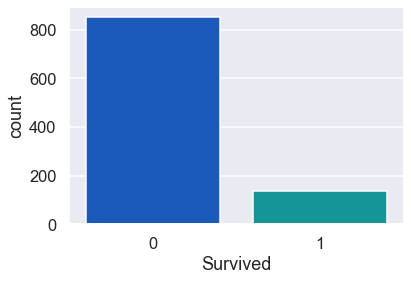

In [51]:
sns.countplot(x="Survived", data=data, palette="winter")

In [52]:
data["Survived"].value_counts()

0    852
1    137
Name: Survived, dtype: int64

<p>From 989 passengers are only 137 were saved</p>

<h3>2.2 Converting columns with categorical values</h3>
<p style="font-size:18px">I have two columns that I want to use in my model: "Category" and "Sex". The rest I will drop.</p>

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  989 non-null    int64   
 1   Country      989 non-null    object  
 2   Firstname    989 non-null    object  
 3   Lastname     989 non-null    object  
 4   Sex          989 non-null    object  
 5   Age          989 non-null    int64   
 6   Category     989 non-null    object  
 7   Survived     989 non-null    int64   
 8   agegroup     989 non-null    category
dtypes: category(1), int64(3), object(5)
memory usage: 63.1+ KB


In [22]:
data.drop(["Country", "Firstname", "Lastname", "agegroup"], axis=1, inplace=True)

In [23]:
data.head()

,PassengerId,Sex,Age,Category,Survived
0,1,M,62,P,0
1,2,F,22,C,0
2,3,F,21,C,0
3,4,M,53,C,0
4,5,F,55,P,0


In [24]:
sex = pd.get_dummies(data["Sex"], drop_first=True)

In [25]:
sex

,M
0,1
1,0
2,0
3,1
4,0
...,...
984,0
985,1
986,1
987,0


In [26]:
category = pd.get_dummies(data["Category"], drop_first=True)

In [27]:
category

,P
0,1
1,0
2,0
3,0
4,1
...,...
984,1
985,1
986,1
987,1


In [28]:
data=pd.concat([data, sex, category], axis=1)

In [29]:
data.head()

,PassengerId,Sex,Age,Category,Survived,M,P
0,1,M,62,P,0,1,1
1,2,F,22,C,0,0,0
2,3,F,21,C,0,0,0
3,4,M,53,C,0,1,0
4,5,F,55,P,0,0,1


In [30]:
data.drop(["Category", "Sex"], axis=1, inplace=True)

In [31]:
data.head()

,PassengerId,Age,Survived,M,P
0,1,62,0,1,1
1,2,22,0,0,0
2,3,21,0,0,0
3,4,53,0,1,0
4,5,55,0,0,1


<h2>3. Logistic Regression</h2>

<h3>3.1 Split Data</h3>

In [34]:
X = data[["Age", "M", "P"]]
y = data["Survived"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

<h3>3.2 Train Data</h3>

In [37]:
logmodel = LogisticRegression(max_iter=100)
logmodel.fit(X_train,y_train)

LogisticRegression()

<h3>3.3 Prediction</h3>

In [39]:
predictions = logmodel.predict(X_test)

<h4> 3.3.1 Create a classification report for the modell.</h4>

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       258
           1       0.00      0.00      0.00        39

    accuracy                           0.86       297
   macro avg       0.43      0.49      0.46       297
weighted avg       0.75      0.86      0.80       297



<h4>3.3.2 Performance test with Confusion Matrix.</h4>

In [42]:
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[255,   3],
       [ 39,   0]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

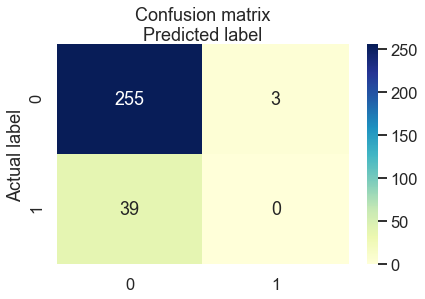

In [43]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<p style="font-size:16px">At first I was surprised about the results of the prediction. But then I started looking for an explanation.<br>
I had to look right away to see how many were saved (see below). With these numbers (from 989 Passengers only 137 People survived) we can't expect results to be better. The reason in my opinion is, that shuffling and splitting into train and test data won't work properly due to the low numbers of overall data and especially survivors. In this case the model will always predict death with a high accuracy of 87%, the chances to survive were very low.</p>

In [50]:
data["Survived"].value_counts()

0    852
1    137
Name: Survived, dtype: int64

<h2>4. Can we expect other results with different ML algorithms?</h4>

<h3>4.1 Decision tree classifier algorithm</h3>

In [44]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8484848484848485

In [45]:
clf.feature_importances_

array([0.65469113, 0.26767884, 0.07763003])

<h3>4.2 Random forest classifier algorithm</h3>

In [46]:
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit (X_train, y_train)
clf.score (X_test, y_test)

0.8181818181818182

<h3>4.3 Gradient boosting classifier algorithm</h3>

In [47]:
clf = ensemble.GradientBoostingClassifier()
clf.fit (X_train, y_train)
clf.score (X_test, y_test)

0.8282828282828283

<p style="font-size:18px">Maybe with lower numbers of estimators?</p>

In [48]:
clf = ensemble.GradientBoostingClassifier(n_estimators=50)
clf.fit (X_train, y_train)
clf.score (X_test, y_test)

0.8653198653198653

<p style="font-size:18px">As we can see, the best results we get with our logistic regression algorithm, followed by gradient boosting with lower numbers of boosting stages, but that does not mean much.</p>